# First Neural Network - Udacity Project

This Jupyter Notebook is my implementation of the deep learning foundations nano degree from Udacity. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imp
from udacity.bike_data import load_bike_data
from diagrams.draw_network import draw_example_1
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Bike Data

For the Udacity Project we are required to train a neural network we implement with numpy on bike usage data. This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the cnt column.

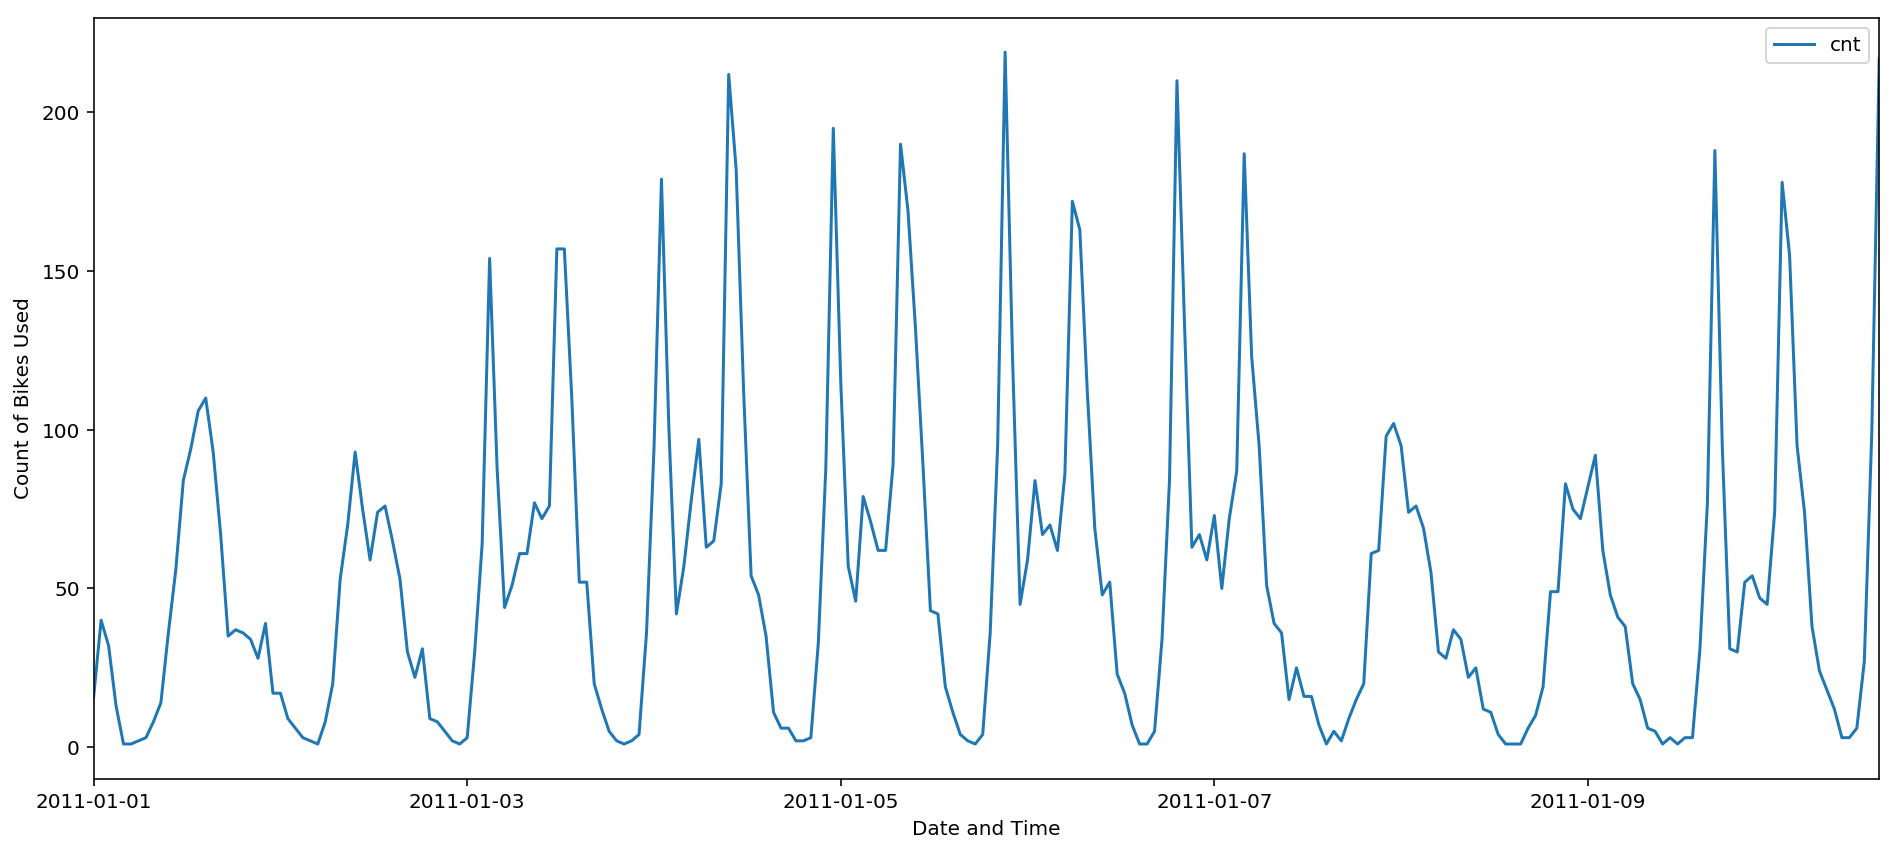

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
data_path = "Bike-Sharing-Dataset/hour.csv"
rides = pd.read_csv(data_path)

rides[:24*10].plot(x='dteday',y='cnt', figsize=(16,7))
plt.xlabel('Date and Time')
plt.ylabel('Count of Bikes Used')
plt.show()
rides.head()

## Train-Validation-Test Split

The udacity project provides scripts for preprossing the data that includes making dummy features for categorical variables ('season', 'weathersit', 'mnth', 'hr', 'weekday') and normalize the numerical features ('casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed').  Additionally, it also splits the data into training data, validation data, and testing data, so we can estimate out of sample performance while fitting and after fitting the model

In [3]:
train_features, train_targets, val_features, val_targets,\
        test_features, test_targets,\
        test_data, scaled_features = load_bike_data(data_path)

# Derivation of Deep Learning Regression

For this project we are asked to create a regression model that predicts that count of bikes that are going to be rented at a particular hour of a particular day.   Our model will make a prediction $\hat{y}$ and the goal is to minimize the mean squared error of the prediction on all observed data.  This is the loss function, and the loss function for this regression problem is given by:

$$ Loss = \frac{1}{2 N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right)^2 $$

The Udacity project has us building a 2 layer neural network that is similar in structure to the following graph:

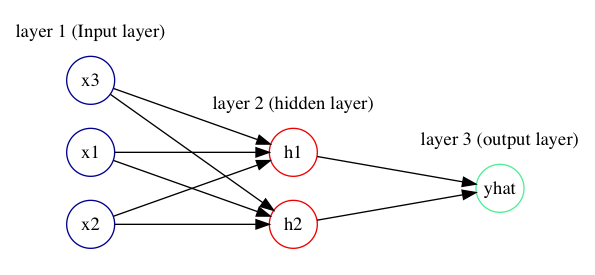

In [4]:
draw_example_1()

In this case $\hat{y}$ is given by the following equation:

$$ \hat{y_i} = \begin{bmatrix} h_{i \ 1} & h_{i \ 2} \end{bmatrix} \times \begin{bmatrix} w^h_{1} \\ w^h_{2} \end{bmatrix} $$

Where each edge has an associated weight $w^h_i$ associated with it.  This is for the two layers neural network presented above.  The equation for an arbitrary number of nodes in the hidden layer, we would use the following equation:

$$ = \sum_{j} h_{i \ j} \ w^h_{j} $$


We will be using gradient decent algorithm on the weights which states that what can update the values of the weights using the following equation:

$$ w^k_{i \ j} = w^k_{i \ j} - \alpha \frac{\partial}{\partial w^k_{i \ j}} Loss $$

where $\alpha$ is known as the learning rate.

If we want to find the update rule for the weights of the hidde layers, we can differentiate the the loss to find the following result:

$$ \frac{\partial}{\partial w^h_k} Loss = \frac{-1}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) h_{i \ k} $$

Insrting this into the gradient update rule provides us the weight update for the hidden layer:

$$  w^h_k =  w^h_k + \frac{\alpha}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) h_{i \ k} $$

We can translate this into matrix form for the example network from above and get the following equation:

$$ \begin{bmatrix} w^h_{1} \\ w^h_{2} \end{bmatrix} = \begin{bmatrix} w^h_{1} \\ w^h_{2} \end{bmatrix} + \frac{\alpha}{N} \ \sum_{i=1}^N \left( y_i - \hat{y_i} \right) \begin{bmatrix} h_{i \ 1} \\ h_{i \ 2} \end{bmatrix} $$

The output of the hidden layer in our example graph is given by the following equation:

$$ h = sigmoid \left( 
    \begin{bmatrix} x_{1} & x_{2} & x_{3} \end{bmatrix}
    \times
    \begin{bmatrix} w^I_{11} & w^I_{12} 
    \\ w^I_{21} & w^I_{22}
    \\ w^I_{31} & w^I_{32}
    \end{bmatrix} 
    \right)
    $$
    
Another perspective on this equation is:

    
$$ h = \begin{bmatrix}
            sigmoid \left( \sum_i x_i \ w^I_{i1} \right) &
            sigmoid \left( \sum_i x_i \ w^I_{i2} \right) &
       \end{bmatrix}
$$

For an arbitrary number of notes between the input and hidden layer, we get the following equation a given hidden nodes output:  

$$ h_j = sigmoid \left( \sum_i x_i \ w^I_{i \ j} \right) $$

Differentiating the Loss function by the input rate gives us the flowing result:

$$ \frac{\partial}{\partial w^I_{n \ m}} Loss = \frac{-1}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) w^h_k 
    \frac{\partial}{\partial w^I_{n \ m}} h_{i \ k} $$

We can differentiate the hidden output equation above and produe the following results:

$$ \frac{ \partial h_j }{\partial w^I_{n \ m}} = h_j \ \left( 1 - h_j \right) \frac{ \partial }{\partial w^I_{n \ m}}   \sum_i x_i \ w^I_{i \ j} $$

Since the hidden layer need to use the input weight, we can rewrite this in the following way:

$$ \frac{ \partial h_j }{\partial w^I_{n \ m}} = h_j \ \left( 1 - h_j \right) x_n \delta_{jm} $$

Combining the above quations gives us the differential of the loss function:

$$ \frac{\partial}{\partial w^I_{n \ m}} Loss = \frac{-1}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) w^h_k 
     h_{i \ k} \left( 1 - h_{i \ k} \right) x_n \delta_{mk} $$

The weight update for the input layer is then:

$$  w^I_{n \ m} =  w^I_{n \ m} +  \frac{\alpha}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) w^h_k 
     h_{i \ k} \left( 1 - h_{i \ k} \right) x_n \delta_{mk} $$

This equation can be converted back to the matrix for in our above example to get the follow equation:

$$  \begin{bmatrix} 
        w^I_{11} & w^I_{12} \\ 
        w^I_{21} & w^I_{22} \\
        w^I_{31} & w^I_{32}
    \end{bmatrix} = \begin{bmatrix} 
        w^I_{11} & w^I_{12} \\ 
        w^I_{21} & w^I_{22} \\
        w^I_{31} & w^I_{32}
    \end{bmatrix}  + \frac{\alpha}{N} \sum_{i=1}^N \left( y_i - \hat{y_i} \right) 
    \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \end{bmatrix}
    \begin{bmatrix} w^h_1 h_{i \ 1} (1 - h_{i \ 1}) & w^h_2 h_{i \ 2} (1 - h_{i \ 2}) \end{bmatrix}
    $$


## Unit Tests


Running Udacity provided unit tests to make sure my network is training correctly:a

In [5]:
import unittest
from udacity.unit_tests import *
suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Training the network


In [6]:
from udacity.neural_network import NeuralNetwork
import sys

def MSE(y, Y):
    return np.mean((y-Y)**2)

### Set the hyperparameters here ###
iterations = 3000
learning_rate = 0.05
hidden_nodes = 4
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.287 ... Validation loss: 0.450

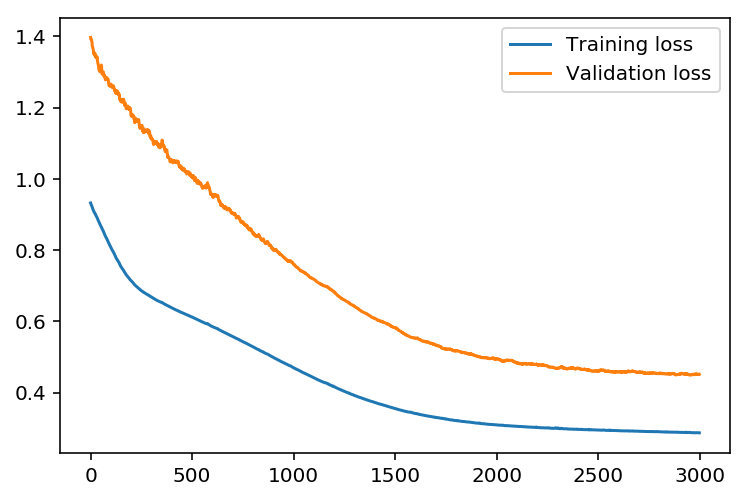

In [7]:

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

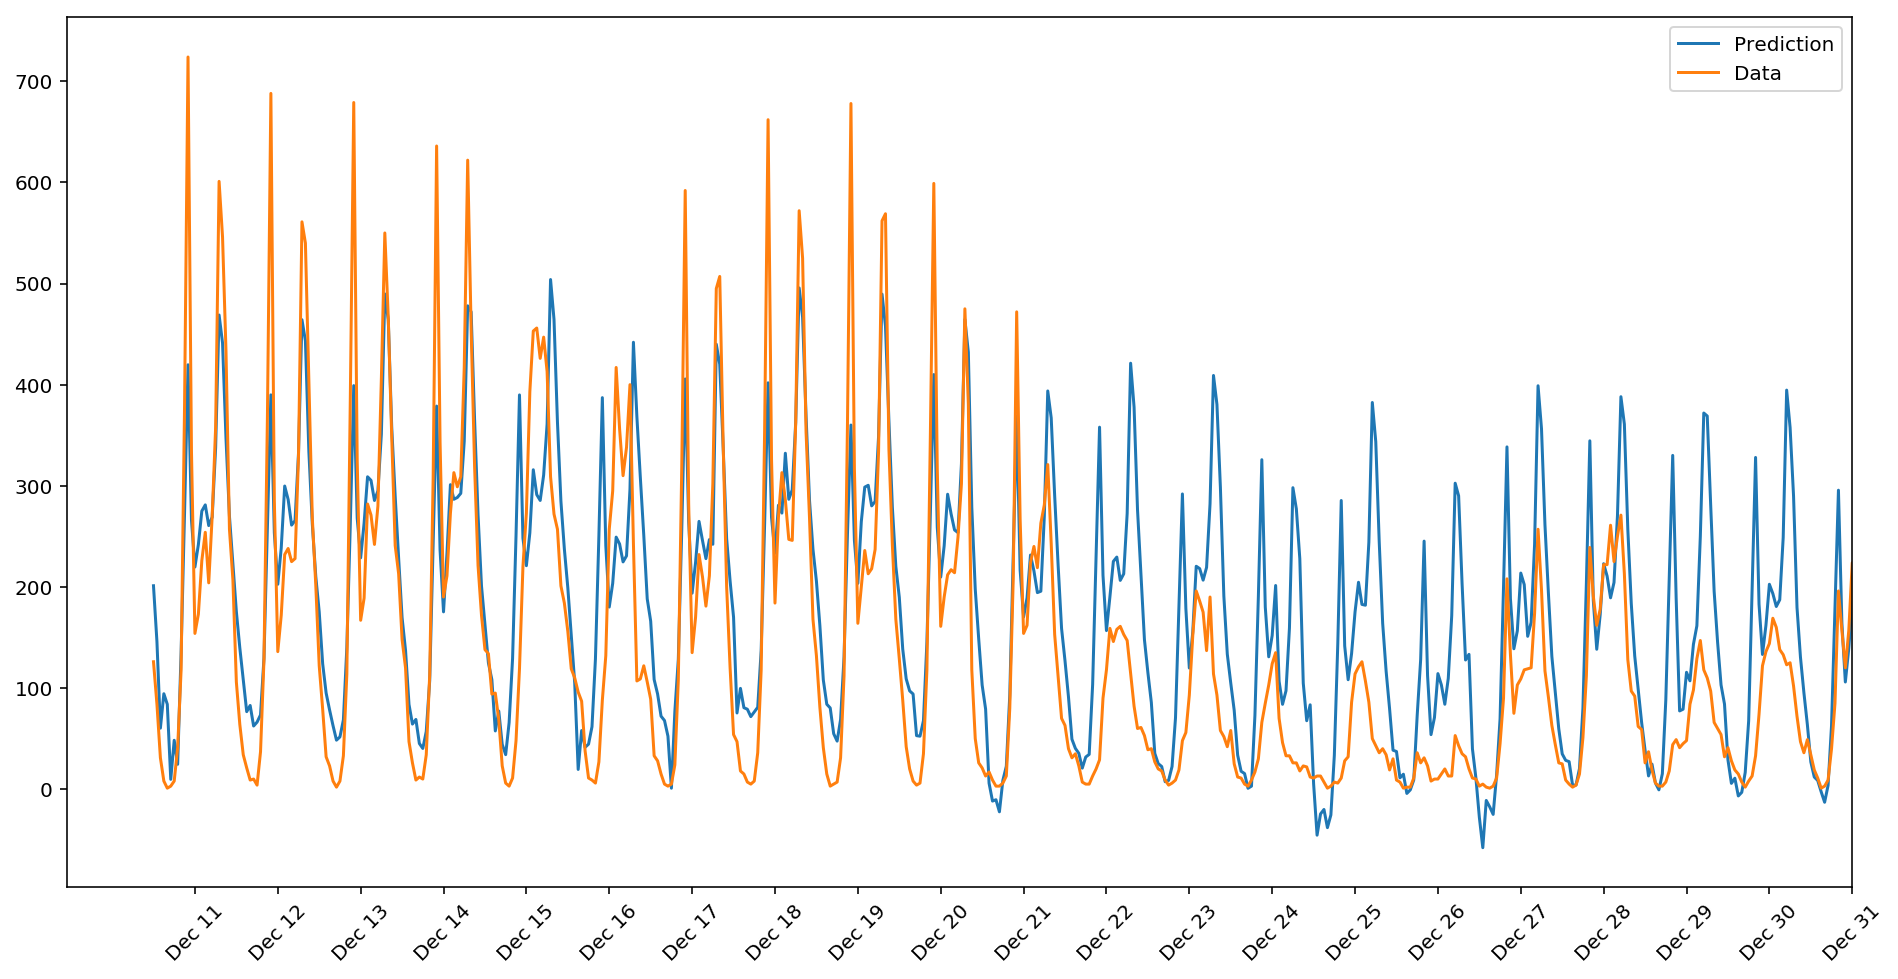

In [8]:

fig, ax = plt.subplots(figsize=(16,8))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

### How well does the model predict the data? Where does it fail? Why does it fail where it does?

The model does a good job picking up the daily and weekly cycling, but does not capture the change in scale of daily rentals during the week of Christmas and New Years.  Time series data aroun user behavior can usually be broken down as a sum of cyclic functions at different time scales (addressed by the dummy variables), some growth/scale behavior (not fit?) and exception for holidays or special days.  The data as provided has no features realted to holidays, and the growth trends require data over many cycles (which we do not have).   Our model performance is is a reflect of the data provided, but it could use more data as well as better features to improve performance.